In [1]:
import pandas as pd
#pandas.io.parsers.read_csv
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
x = np.loadtxt(open("train.csv", "r"), delimiter=",", skiprows=1)

y = x[:,:1]
X = x[:,1:]

Y = np.zeros((42000,10))
for i in range(y.shape[0]):
    Y[i,int(y[i][0])] = 1

Y = Y.T
X = X.T

In [3]:
def initialize_parameters():
    tf.set_random_seed(1)             
        
    W1 = tf.get_variable("W1", shape = [100, 784], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", shape = [100, 1],   initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", shape = [10, 100],  initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", shape = [10, 1],    initializer = tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                 }
    
    return parameters
    

In [4]:
def create_placeholders(n_x, n_y):
    X = tf.placeholder(tf.float32, shape = [n_x,None], name = 'X')
    Y = tf.placeholder(tf.float32, shape = [n_y,None], name = 'Y')

    return X, Y

In [5]:
def forward_propagation(X, parameters):

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    

    Z1 = tf.add(tf.matmul(W1, X),b1)                      

    A1 = tf.nn.relu(Z1)                                   

    Z2 = tf.add(tf.matmul(W2, A1), b2)                     

    return Z2

In [6]:
def compute_cost(Z3, Y):

    y_hat = tf.transpose(Z3)
    y = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = y_hat))
    return cost

In [7]:
def random_mini_batches(X_train, Y_train, minibatch_size, seed, num_minibatches):
    minibatches = []
    for i in range(num_minibatches):
        minibatch = (X[:,i * minibatch_size:(i + 1) * minibatch_size], Y[:,i * minibatch_size:(i + 1) * minibatch_size])
        minibatches.append(minibatch)
    
    return minibatches

In [8]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 200, minibatch_size = 50, print_cost = True):

    
    
    tf.set_random_seed(1)                            
    seed = 3                                          
    n_x = X_train.shape[0]                        
    m = 42000
    n_y = Y_train.shape[0]                         
    costs = []                                       
    

    X, Y = create_placeholders(n_x, n_y)

    parameters = initialize_parameters()

    Z3 = forward_propagation(X, parameters)

    cost = compute_cost(Z3, Y)

    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)

        for epoch in range(num_epochs): #iterations
            _, current_cost = sess.run([optimizer, cost], feed_dict = {X: X_train, Y: Y_train})

            if print_cost == True and epoch % 100 == 0:
                print("Cost after epoch %i: %f" % (epoch, current_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(current_cost)
                
        
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        print("Cost after epoch %i: %f" % (epoch, current_cost))
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")
        
        
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
#        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

W0716 19:07:22.460267 10724 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0716 19:07:22.532668 10724 deprecation.py:323] From <ipython-input-6-9ce2e1a3d22e>:7: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Cost after epoch 0: 174.187820
Cost after epoch 100: 14.040037


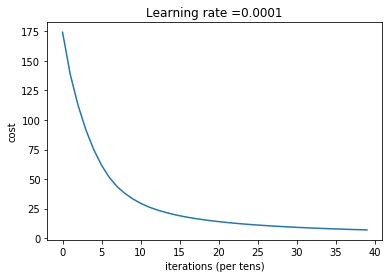

Cost after epoch 199: 6.864248
Parameters have been trained!
Train Accuracy: 0.82778573


In [9]:
parameters = model(X, Y, X, Y)